In [1]:
#import required libraries 

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#reading the file from the folder
data = pd.read_csv("data.csv")

In [3]:
data.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [4]:
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.636656,0.638431,5.497436,-9.481631,0.538462,0.148957,0.319093,0.192337,0.148455,0.493632,121.086174,213408.933333,3.912821,0.512821
std,0.216614,0.260096,3.415209,6.525086,0.499802,0.120414,0.320782,0.346226,0.105975,0.267695,28.084829,72152.392864,0.451332,0.501122
min,0.130000,0.002400,0.000000,-42.261000,0.000000,0.027800,0.000003,0.000000,0.033100,0.035300,60.171000,77203.000000,1.000000,0.000000
25%,0.462500,0.533500,2.000000,-9.962000,0.000000,0.056800,0.042200,0.000000,0.084000,0.269000,100.242000,178300.500000,4.000000,0.000000
50%,0.705000,0.659000,6.000000,-7.766000,1.000000,0.096200,0.213000,0.000008,0.105000,0.525000,124.896000,204000.000000,4.000000,1.000000
75%,0.799000,0.837500,8.000000,-5.829000,1.000000,0.230500,0.504000,0.097500,0.177000,0.717500,142.460500,242373.500000,4.000000,1.000000
max,0.946000,0.996000,11.000000,-2.336000,1.000000,0.540000,0.995000,0.969000,0.633000,0.980000,180.036000,655213.000000,5.000000,1.000000


In [5]:
data.shape

(195, 14)

In [6]:
#check if there is any missing value

data.isna().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

In [10]:
#finding total number of missing values

data.isna().sum().sum()

0

<AxesSubplot:>

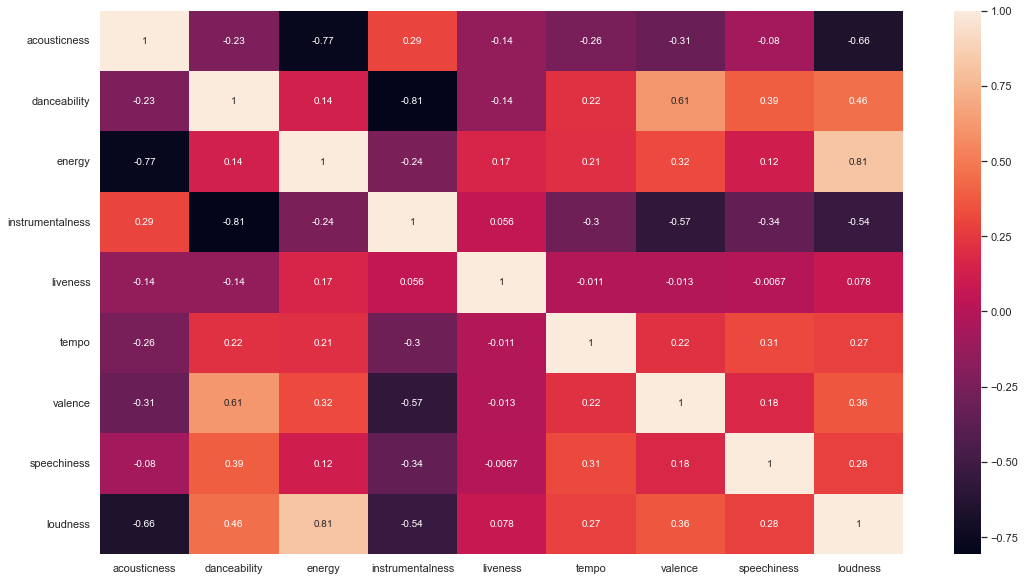

In [19]:
#finding a correlation between different quantities like tempo, danceability 

corr = data[['acousticness','danceability','energy',
'instrumentalness','liveness','tempo','valence', 'speechiness', 'loudness']].corr()

sns.set(style='darkgrid')

%matplotlib inline
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [22]:
#finding out how many songs are liked or not liked

data['liked'].value_counts()

1    100
0     95
Name: liked, dtype: int64

In [23]:
data['mode'].value_counts()

1    105
0     90
Name: mode, dtype: int64

In [25]:
data.corr().style.background_gradient(cmap='Greens')

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
danceability,1.000000,0.137188,-0.063906,0.455078,0.043759,0.388596,-0.234176,-0.807053,-0.137069,0.612344,0.223522,-0.232621,0.317096,0.569425
energy,0.137188,1.000000,0.130251,0.813567,-0.068308,0.122825,-0.772583,-0.241444,0.166508,0.319409,0.214905,-0.134527,0.123942,0.176179
key,-0.063906,0.130251,1.000000,0.046865,-0.103371,-0.093395,-0.066844,0.003597,-0.039622,0.033336,0.097240,0.054522,0.048344,-0.044406
loudness,0.455078,0.813567,0.046865,1.000000,-0.041678,0.279710,-0.664989,-0.538266,0.078093,0.363532,0.274462,-0.206334,0.207806,0.410774
mode,0.043759,-0.068308,-0.103371,-0.041678,1.000000,0.031953,-0.025709,0.075442,-0.048661,0.033409,-0.036270,-0.060965,-0.110739,0.023747
speechiness,0.388596,0.122825,-0.093395,0.279710,0.031953,1.000000,-0.079710,-0.343242,-0.006665,0.180708,0.313918,-0.388397,0.140325,0.591505
acousticness,-0.234176,-0.772583,-0.066844,-0.664989,-0.025709,-0.079710,1.000000,0.294320,-0.140988,-0.313806,-0.255097,0.138793,-0.142177,-0.179375
instrumentalness,-0.807053,-0.241444,0.003597,-0.538266,0.075442,-0.343242,0.294320,1.000000,0.055730,-0.572224,-0.299493,0.249683,-0.375199,-0.569440
liveness,-0.137069,0.166508,-0.039622,0.078093,-0.048661,-0.006665,-0.140988,0.055730,1.000000,-0.013004,-0.010555,-0.143966,-0.135409,-0.009797
valence,0.612344,0.319409,0.033336,0.363532,0.033409,0.180708,-0.313806,-0.572224,-0.013004,1.000000,0.218017,-0.114842,0.201111,0.268653


Observations:

The user's data has to be compared against the 'liked' variable compared to all the other colums to discern his/her taste.

Following this, we can make these observations:

1) User likes songs with high danceability, speechiness and loudness

2) User has an aversion to songs with acousticness, instrumentalness 

3) User does not like long songs


In [27]:
#dividing the liked column based on likes and dislikes

liked = data['liked'] == 1
disliked = data['liked'] == 0
liked_songs = data[liked]
disliked_songs = data[disliked]

Point of action after dividing datasets:

1) Comparison of speechiness between liked and disliked songs

2) Comparison of danceability between liked and disliked songs

3) Comparison of loudness between liked and disliked songs

4) Comparison of acousticness between liked and disliked songs

5) Comparison of instrumentalness between liked and disliked songs

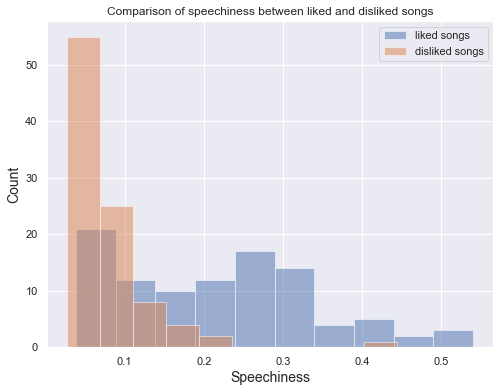

In [28]:
#Comparison of speechiness between liked and disliked songs

plt.figure(figsize=(8,6))
plt.hist(liked_songs['speechiness'], alpha=0.5, label="liked songs")
plt.hist(disliked_songs['speechiness'], alpha=0.5, label="disliked songs")

plt.xlabel("Speechiness", size=14)
plt.ylabel("Count", size=14)
plt.title("Comparison of speechiness between liked and disliked songs")
plt.legend(loc='upper right')

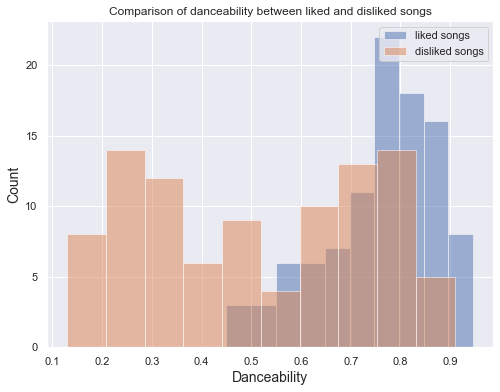

In [29]:
#Comparison of danceability between liked and disliked songs

plt.figure(figsize=(8,6))
plt.hist(liked_songs['danceability'], alpha=0.5, label="liked songs")
plt.hist(disliked_songs['danceability'], alpha=0.5, label="disliked songs")

plt.xlabel("Danceability", size=14)
plt.ylabel("Count", size=14)
plt.title("Comparison of danceability between liked and disliked songs")
plt.legend(loc='upper right')

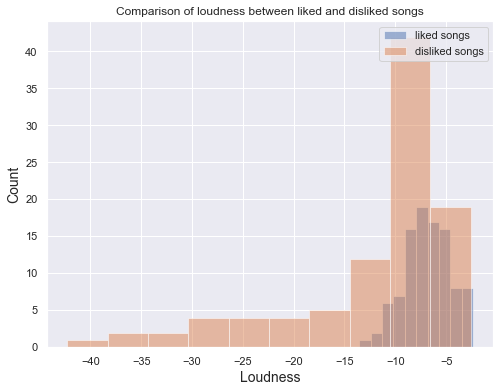

In [30]:
#Comparison of loudness between liked and disliked songs

plt.figure(figsize=(8,6))
plt.hist(liked_songs['loudness'], alpha=0.5, label="liked songs")
plt.hist(disliked_songs['loudness'], alpha=0.5, label="disliked songs")

plt.xlabel("Loudness", size=14)
plt.ylabel("Count", size=14)
plt.title("Comparison of loudness between liked and disliked songs")
plt.legend(loc='upper right')

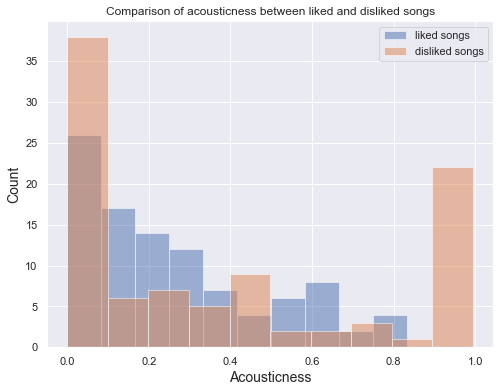

In [31]:
#Comparison of acousticness between liked and disliked songs

plt.figure(figsize=(8,6))
plt.hist(liked_songs['acousticness'], alpha=0.5, label="liked songs")
plt.hist(disliked_songs['acousticness'], alpha=0.5, label="disliked songs")

plt.xlabel("Acousticness", size=14)
plt.ylabel("Count", size=14)
plt.title("Comparison of acousticness between liked and disliked songs")
plt.legend(loc='upper right')

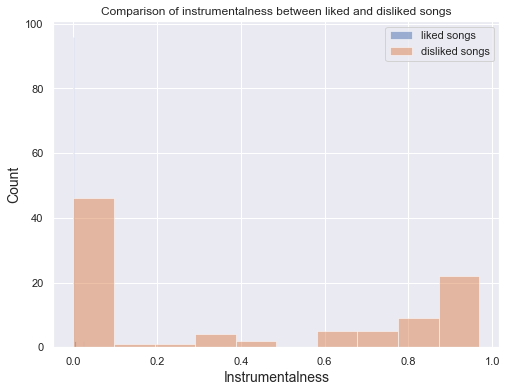

In [32]:
#Comparison of instrumentalness between liked and disliked songs

plt.figure(figsize=(8,6))
plt.hist(liked_songs['instrumentalness'], alpha=0.5, label="liked songs")
plt.hist(disliked_songs['instrumentalness'], alpha=0.5, label="disliked songs")

plt.xlabel("Instrumentalness", size=14)
plt.ylabel("Count", size=14)
plt.title("Comparison of instrumentalness between liked and disliked songs")
plt.legend(loc='upper right')